# Zipf's Law

This notebook demonstrates Zipf's law using the text from the movie script of Shrek 2.

Zipf's Law states that the frequency of any word in a text is inversaly proportional to its rank in the frequency table, that is, if a word appears N time in a text, then the second most frequent word will appear N/2 times in the same text, the third one will appear N/3 times, the fourth one N/4 times and so on.

In [111]:
import string
import re
import requests

# read the script from shrek 2, downloaded from http://www.script-o-rama.com/movie_scripts/s/shrek-2-script-transcript.html
f = open('texts/shrek.txt', 'r')
text = f.read()
f.close()

# sherlock holmes book
req = requests.get('https://www.gutenberg.org/files/1661/1661-0.txt')
text = req.content.decode('utf-8')


# remove newlines and punctuation
text = text.translate(str.maketrans('', '', string.punctuation))
text = re.sub("(|\[|\]|!|\.|,|-|\(|\)|;|\?|\"|“|:)", '', text)

# Display text length and first 500 characters
print("Text lenght: ", len(text))
print(text[0:500])

# count words
word_count = {}
for word in text.split():
    word = word.lower()
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

Text lenght:  574423
﻿The Project Gutenberg eBook of The Adventures of Sherlock Holmes by Arthur Conan Doyle

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever You may copy it give it away or reuse it under the terms
of the Project Gutenberg License included with this eBook or online at
wwwgutenbergorg If you are not located in the United States you
will have to check the laws of the country where you are l


## Most frequent words in the text

Sort the word dictionary built previously 

In [112]:
# sort by count
sorted_word_count = sorted(word_count.items(), key= lambda x : x[1], reverse=True)
for w, c in sorted_word_count[0:10]:
    print(f"{w:<6} : {c}")

the    : 5796
and    : 3048
i      : 2949
of     : 2774
to     : 2751
a      : 2676
in     : 1809
that   : 1719
it     : 1610
he     : 1461


## Plotting

Plotting the real word count

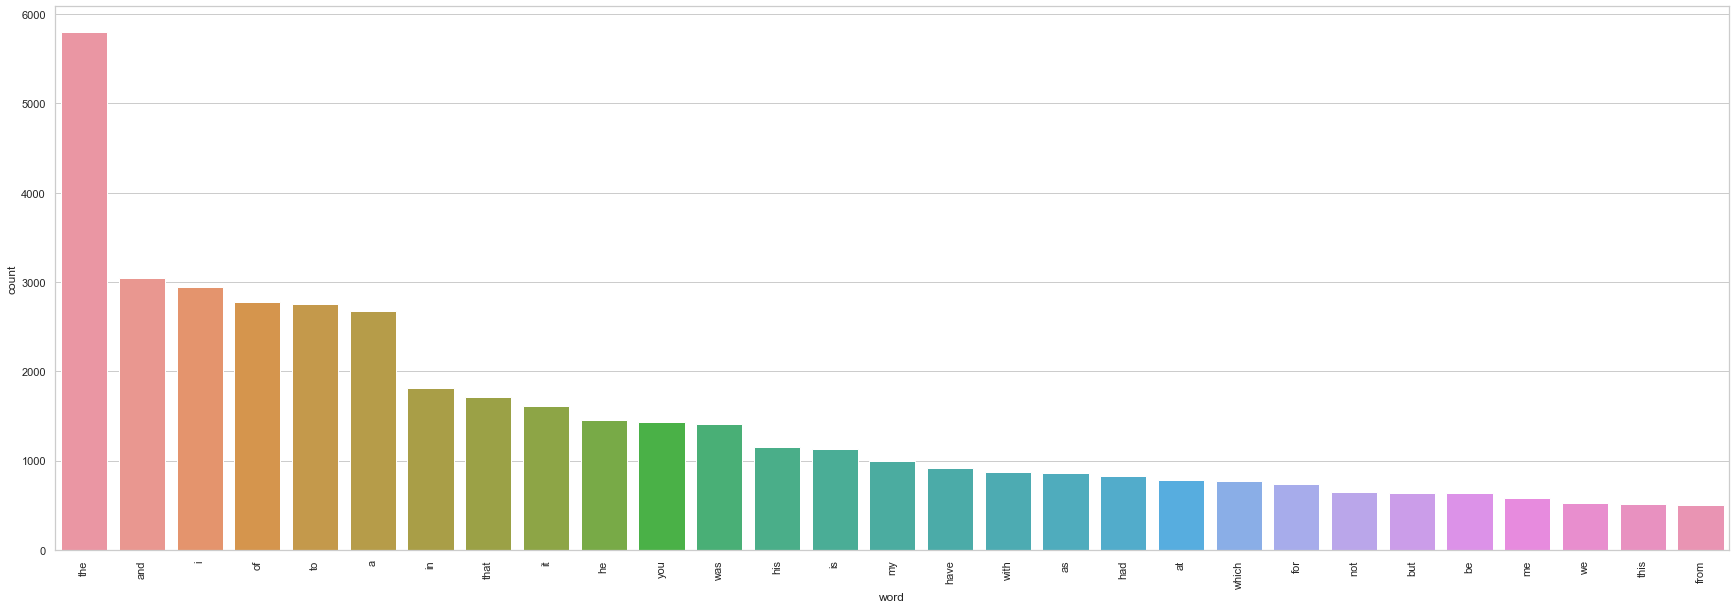

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create pandas data frame
df = pd.DataFrame(sorted_word_count,  columns=['word', 'count'])
df = df[df['count'] > 500]

# plot bar graph 
fig = plt.figure(figsize=(30,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=df.word,y=df['count'])
sns.barplot(x=df.word,y=df['count'])

# rotate bar label
plt.xticks(rotation=90)
plt.show()

Plotting word count prediction according to Zipf' Law

To estimate the count of a word using Zipf's Law we need the count of the most frequent word in the text and multiply it by 1/N, where N is the word rank, in our example we can use the following expression: 
<code>count_of_most_frequent = sorted_word_count[0][1]</code>

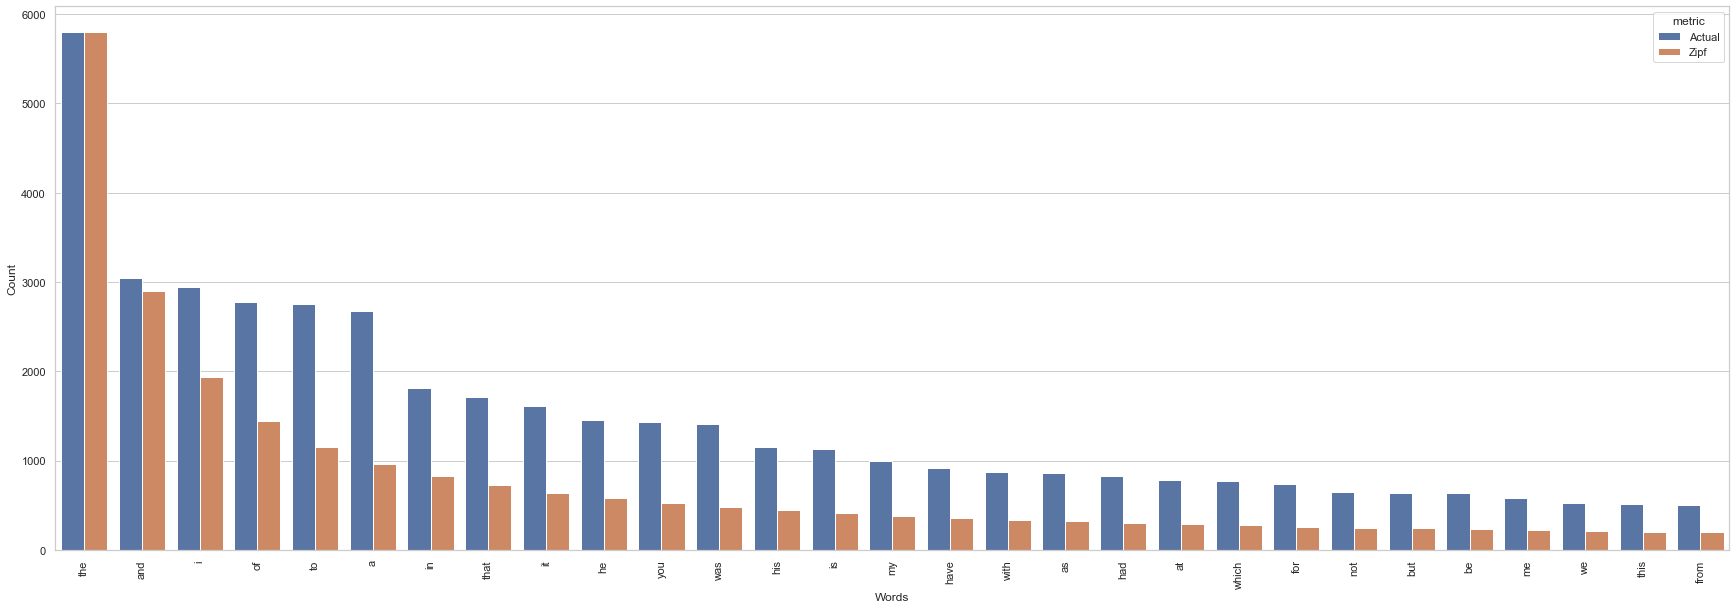

In [114]:
# add estimated count according to zipf's law to the data frame
count_of_most_frequent = sorted_word_count[0][1]
zipf_count = []
for i , word in enumerate(sorted_word_count):
    estimatimative = count_of_most_frequent * (1/(i+1))
    t = (word[0], word[1], estimatimative)
    zipf_count.append(t)


# create pandas data frame
zdf = pd.DataFrame(zipf_count,  columns=['word', 'Actual', 'Zipf'])
zdf = zdf[zdf['Actual'] > 500]

# rearranges the dataframe so it can be used by barplot
zdf = zdf.melt('word', var_name='metric')

# plot the bar graph
plt.figure(figsize=(30,10))
sns.set_theme(style="whitegrid")
sns.barplot(x='word', y='value', hue='metric', data=zdf)

# rotate bar label
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()